In [3]:
import preprocessing as prep
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

import matplotlib as mpl
import matplotlib.pyplot as plt

# Command so that plots appear in the iPython Notebook
%matplotlib inline

In [126]:
path_list = [
    "../00_Data/testset_2015_1h/2015082215",
    "../00_Data/testset_2015_1h/2015092215",
    "../00_Data/testset_2015_1h/2015102215"
]
path_list = ["../00_Data/testset_2015_1h/2015082215"]

In [127]:
#for p in path_list:
#for i in list(range(1)):

fc = prep.get_fc(path_list[0], 0)
df = prep.get_dataframe(fc)
df = prep.calcIds(df, 0.9)
dft = prep.df_to_timeseries(df)


### file ../00_Data/testset_2015_1h/2015082215 cam 0


In [128]:
dft.head()

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
2986,1,0,1,1,1,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
2811,1,1,1,0,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2619,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2180,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2053,1,1,1,1,1,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [129]:
def einsen_stat(summe):
    print(summe.shape)
    print(summe.head())
    print(summe.describe())
    print(summe.value_counts().sort_index())
    summe.plot.hist(bins=20)

### Wie viele Einsen insgesamt?

(1933,)
2986    243
2811     34
2619    109
2180    222
2053    209
dtype: int64
count    1933.000000
mean       74.260735
std       172.746752
min         1.000000
25%         1.000000
50%         2.000000
75%        12.000000
max      1024.000000
dtype: float64
1       740
2       304
3       154
4        76
5        57
6        32
7        23
8        16
9        31
10        8
11        8
12        6
13        5
14        7
15        6
16        5
17        3
18        4
19        1
20        1
21        2
23        3
25        4
26        1
27        2
28        6
29        3
31        4
32        2
34        2
       ... 
694       1
699       1
701       1
707       1
709       2
710       1
723       1
728       1
737       1
742       1
760       1
763       1
764       1
776       1
777       1
792       1
796       1
804       1
829       1
854       1
870       1
888       1
896       1
907       1
933       1
942       1
946       2
969       1
990       1
1024      1
dtyp

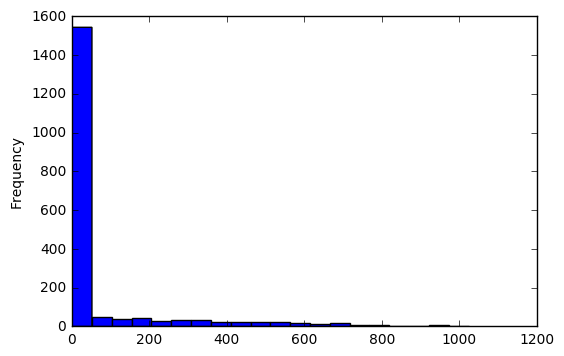

In [130]:
summe1 = dft.sum(axis=1)
einsen_stat(summe1)

### Wie lang sind die Einsenketten so?

In [131]:
dft.head()

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
2986,1,0,1,1,1,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
2811,1,1,1,0,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2619,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2180,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2053,1,1,1,1,1,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [132]:
def get_ketten(kette, val):
    counter = 0
    laengen = []
    for i in list(range(len(kette))):
        if (kette[i] == val):
            counter = counter + 1
        else:
            if (counter > 0):
                laengen.append(counter)
                counter = 0
    if (counter > 0):
        laengen.append(counter)

    return laengen
        

In [133]:
# ketten zusammenwerfen und histogramm anschauen
def ketten_hist(liste):
    print(liste.shape)
    slist = [item for row in liste for item in row]
    print(len(slist))
    print(Series(slist).describe())
    print(Series(slist).value_counts().sort_index())
    print(Series(slist).value_counts().sort_index().describe())
    Series(slist).hist(bins=100)

## Histogramm laenge von 1er ketten

(1933,)
31682
count    31682.000000
mean         4.530838
std         10.373350
min          1.000000
25%          1.000000
50%          2.000000
75%          5.000000
max       1024.000000
dtype: float64
1       13285
2        5176
3        3042
4        2085
5        1446
6        1088
7         805
8         722
9         536
10        463
11        386
12        289
13        270
14        233
15        205
16        194
17        143
18        132
19         89
20        105
21         81
22         85
23         81
24         59
25         39
26         40
27         52
28         32
29         40
30         42
        ...  
103         3
105         3
108         2
109         1
111         1
114         1
115         1
117         1
118         1
119         1
120         1
121         1
123         1
126         1
133         1
134         1
143         1
151         1
154         2
163         2
164         1
165         1
186         1
198         1
199         1
206        

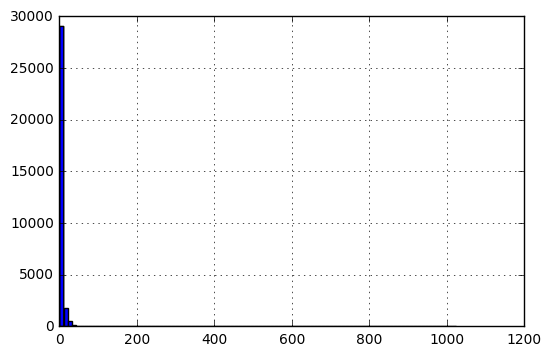

In [134]:
kette1 = dft.apply(get_ketten, axis=1, args=[1])
ketten_hist(kette1)

## Histogramm laenge der 0er Ketten *gaps*

(1933,)
33334
count    33334.000000
mean        55.074279
std        161.676054
min          1.000000
25%          1.000000
50%          2.000000
75%          9.000000
max       1023.000000
dtype: float64
1       11602
2        5068
3        2816
4        1883
5        1283
6         918
7         700
8         548
9         481
10        365
11        323
12        250
13        223
14        207
15        178
16        156
17        123
18        122
19        130
20         98
21         81
22         71
23         80
24         72
25         70
26         56
27         47
28         51
29         61
30         43
        ...  
989         3
990         2
992         2
993         5
994         3
995         3
996         2
998         4
999         1
1001        2
1002        3
1003        2
1004        2
1005        1
1006        3
1007        2
1008        4
1010        1
1011        2
1012        4
1013        1
1014        1
1015        2
1016        3
1018        3
1019       

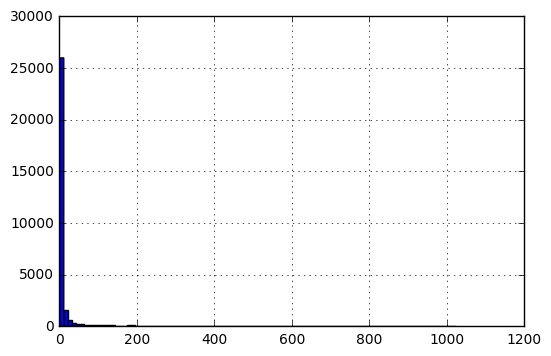

In [135]:
kette0 = dft.apply(get_ketten, axis=1, args=[0])
ketten_hist(kette0)

### Gaps auffuellen

In [136]:
dft_filled = dft.copy().apply(prep.fill_gaps, axis=1)

In [137]:
dft_filled.head()

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
2986,1,1,1,1,1,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
2811,1,1,1,0,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2619,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2180,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2053,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


## laenge der 1er Ketten nach auffuellung der Gaps

(1933,)
20144
count    20144.000000
mean         7.698769
std         17.911134
min          1.000000
25%          1.000000
50%          3.000000
75%          8.000000
max       1024.000000
dtype: float64
1       7478
2       2119
3       1660
4       1235
5        899
6        799
7        616
8        547
9        438
10       433
11       354
12       296
13       269
14       244
15       226
16       189
17       178
18       156
19       131
20       140
21       130
22       104
23       111
24        78
25        76
26        70
27        67
28        63
29        67
30        67
        ... 
164        1
165        1
166        2
173        2
179        1
186        1
187        1
190        1
198        1
204        2
206        1
208        1
216        1
221        1
223        1
227        1
229        1
232        1
236        1
247        1
250        1
275        1
297        1
306        1
332        1
349        1
490        1
572        1
645        1
1024       1
dt

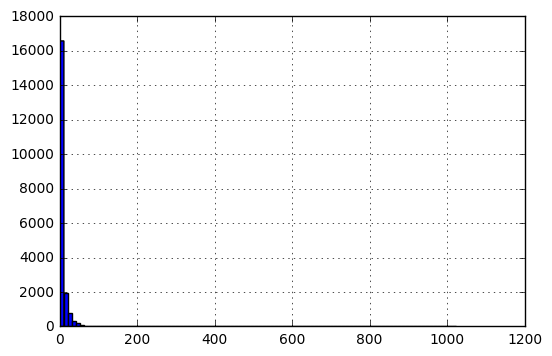

In [138]:
kette_fill_1 = dft_filled.apply(get_ketten, axis=1, args=[1])
ketten_hist(kette_fill_1)

## Laenge der 0er ketten nach auffuellung der gaps

(1933,)
21796
count    21796.000000
mean        83.699211
std        193.931729
min          1.000000
25%          3.000000
50%          5.000000
75%         26.000000
max       1023.000000
dtype: float64
1         64
2       5068
3       2816
4       1883
5       1283
6        918
7        700
8        548
9        481
10       365
11       323
12       250
13       223
14       207
15       178
16       156
17       123
18       122
19       130
20        98
21        81
22        71
23        80
24        72
25        70
26        56
27        47
28        51
29        61
30        43
        ... 
989        3
990        2
992        2
993        5
994        3
995        3
996        2
998        4
999        1
1001       2
1002       3
1003       2
1004       2
1005       1
1006       3
1007       2
1008       4
1010       1
1011       2
1012       4
1013       1
1014       1
1015       2
1016       3
1018       3
1019       3
1020       3
1021       5
1022       1
1023       2
dt

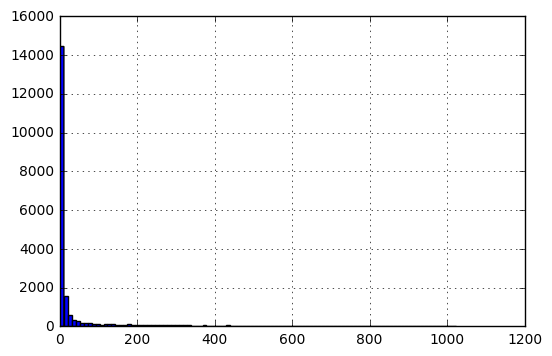

In [139]:
kette_fill_0 = dft_filled.apply(get_ketten, axis=1, args=[0])
ketten_hist(kette_fill_0)

## Wie viele Gaps wurden denn aufgefuellt?

(1933,)
2986    250
2811     34
2619    117
2180    244
2053    224
dtype: int64
count    1933.000000
mean       80.229695
std       185.471932
min         1.000000
25%         1.000000
50%         2.000000
75%        13.000000
max      1024.000000
dtype: float64
1       740
2       299
3       154
4        69
5        55
6        40
7        23
8        12
9        28
10       13
11        9
12        6
13        7
14        5
15        6
16        6
17        4
18        3
19        4
20        2
21        4
25        2
26        2
28        3
29        5
30        3
31        3
32        2
33        1
34        4
       ... 
754       1
758       1
759       1
761       1
764       1
775       1
781       1
794       1
802       1
806       1
808       1
811       1
813       1
826       1
836       1
843       1
850       1
853       1
903       1
904       1
920       1
923       1
942       1
956       1
957       1
962       1
981       1
1001      1
1005      1
1024      1
dtyp

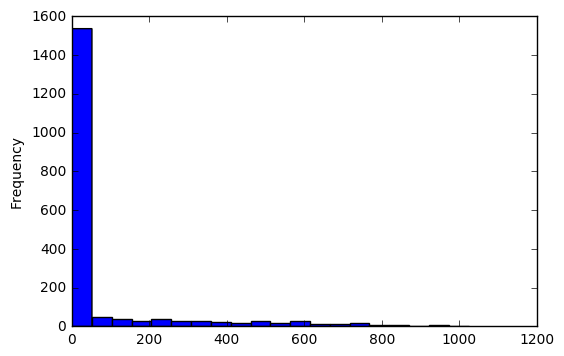

In [140]:
summe2 = dft_filled.sum(axis=1)
einsen_stat(summe2)

In [141]:
(summe2-summe1).sum()

11538

In [142]:
def timeseries_to_df(dft, df):

    # Zurueckumwandeln in urspruegliches Format: Dabei muessen aber die neu 
    # entstandenen Bienen zu bestimmten Zeitpunkten eingebaut werden.
    #
    # t1  bee1 xpos ypos ...
    #	  bee2 xpos ypos ...
    #     ...  ...  ...
    #		
    # t2  bee2 xpos ypos ...
    #     bee3 xpos ypos ...
    #     ...

    df = df.reset_index(['frame_idx', 'fc_id', 'idx'])
    final = DataFrame()
    
    dists = []

    for col in list(range(dft.shape[1])):

        # die indexes wo ne eins steht merken
        l = dft[dft[col] == 1].index.tolist()

        for item in l:
            # print("{}-{}".format(col,item))
            # element zum timeframe rausholen
            tfe = df[df.frame_idx == col]
            if (tfe[tfe['id'] == item].shape[0] > 0):            
                final = pd.concat([final, tfe[tfe['id'] == item]])
            else:
                pre = df[df.frame_idx == col-1]
                predict = pre[pre['id'] == item]

                post = df[df.frame_idx == col+1]
                postdict = post[post['id'] == item]
                
                dist = np.sqrt(np.abs(list(predict['xpos'])[0] - list(postdict['xpos'])[0]) + np.abs(list(predict['ypos'])[0] - list(postdict['ypos'])[0]))
                
                dists.append(dist)
                
                x = (list(predict['xpos'])[0] + list(postdict['xpos'])[0])/2
                y = (list(predict['ypos'])[0] + list(postdict['ypos'])[0])/2
                row = pd.DataFrame({
                    'frame_idx': col,
                    'id':item,
                    'xpos':x,
                    'ypos':y,
                    'timestamp': list(predict['timestamp'])[0],
                    'fc_id': list(predict['fc_id'])[0],
                    'cam_id': list(predict['cam_id'])[0]},
                    index = [col])
                final = final.append(row)

    final = final.set_index(['frame_idx'])

    return dists

In [143]:
liste = timeseries_to_df(dft_filled,df)

In [144]:
Series(liste).min()

0.0

In [145]:
Series(liste).max()

61.261733569986411